# TRABAJO Parte 2: AIA_2022-2023

# Transfer Learning con CNNs - Dataset: Flowers

La idea de este trabajo es familiarizarnos con dos situaciones muy habituales en la actividad real de un "Machine Learning Engineer":
 
1.   En primer lugar, con una de las técnicas más potentes asociadas con las redes neuronales: el **Transfer Learning**. Dado que las redes neuronales, para resolver un problema, capturan en su estructura de capas y pesos una representación jerárquica del problema. 
Entonces..., ¿por qué no aprovechar ese conocimiento obtenido, para resolver otro problema diferente?

2.  En segundo lugar, con la **busqueda de información sobre conceptos nuevos**. En este caso, los dos primeros modelos a implementar los hemos trabajado en clase. No así el Transfer Learning, y por tanto, deberéis buscar vosotros mismos cómo hacer lo que se pide para el Modelo 3. Consultar en blogs, web y tutoriales es algo común en el día a día de alguien que quiere profundizar en el ML y, para ello, existen infinidad de fuentes. A modo de ejemplo, una fuente para profundizar en el Transfer Learning con redes convolucionales es: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/

En este trabajo vamos intentar resolver un problema de clasificación sobre un dataset propuesto por Tensorflow en 2019 conocido como "flowers". Este conjunto está formado por 3670 imágenes de flores pertenecientes a 5 clases diferentes. Para ello implementaremos 3 modelos:

*   Modelo 1: implementación de una CNN básica.
*   Modelo 2: es una evolución del modelo anterior, aplicando técnicas que reduzcan el overfitting.
*   Modelo 3: rompemos la barrera de tener que seguir complicando nuestro modelo y se pide aplicar transfer learning utilizando un pre-trained model.





# a) Carga de datos

Para que no de error las librerias: <br>
pip install tensorflow, numpy, pandas, pathlib


In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import pathlib
import os
import glob
import shutil
tf.__version__

'2.12.0'

Descargamos el dataset que pone a nuestra disposición Tensorflow. 

In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

Tras completar la descarga, debemos tener la siguiente estructura de directorios:  

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>daisy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
</pre>

Desgraciadamente, para este dataset, Tensorflow no nos proporciona la estructura de directorios necesaria de train y de validación. Por lo que debemos proceder del siguiente modo:

* Crear una carpeta `train` y de `val`, cada una de ellas debe contener a su vez, cinco subdirectorios: uno para cada clase de flor.
* Moveremos las imágenes de las carpetas originales a estas nuevas carpetas. De modo que el 80% de las imágenes vayan al conjunto de train y el 20% restante al de validación.
* La estructura final de directorios debe ser la siguiente:

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>train</b>
    |______ <b>daisy</b>: [12.jpg, 28.jpg, 31.jpg ....]
    |______ <b>dandelion</b>: [41.jpg, 22.jpg, 35.jpg ....]
    |______ <b>roses</b>: [121.jpg, 92.jpg, 38.jpg ....]
    |______ <b>sunflowers</b>: [93.jpg, 23.jpg, 83.jpg ....]
    |______ <b>tulips</b>: [109.jpg, 267.jpg, 93.jpg ....]
 |__ <b>val</b>
    |______ <b>daisy</b>: [507.jpg, 508.jpg, 509.jpg ....]
    |______ <b>dandelion</b>: [719.jpg, 720.jpg, 721.jpg ....]
    |______ <b>roses</b>: [514.jpg, 515.jpg, 516.jpg ....]
    |______ <b>sunflowers</b>: [560.jpg, 561.jpg, 562.jpg .....]
    |______ <b>tulips</b>: [640.jpg, 641.jpg, 642.jpg ....]
</pre>

Creamos una lista con el nombre de las 5 clases. En castellano sería: margaritas, diente de león, rosas, girasoles y tulipanes.

In [4]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

Creemos la estructura de directorios necesaria:

In [5]:
SPLIT_RATIO=0.8

for cl in classes:
    # path de las imagenes de la clase cl
    img_path = os.path.join(base_dir, cl)

    # obtenemos la lista de todas las imagenes
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Imagenes".format(cl, len(images)))

    # determinamos cuantas imagenes son el 80%
    num_train = int(round(len(images)*SPLIT_RATIO))

    # separamos las imagenes en dos listas
    train, val = images[:num_train], images[num_train:]
    
    # creamos la carpeta de train/clase y val/clase
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))
    
    # movemos las imagenes
    for t in train:
        shutil.move(t, os.path.join(base_dir, 'train', cl))
    for v in val:
        shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Imagenes


Error: Destination path 'C:\Users\Nocilla\.keras\datasets\flower_photos\train\roses\10090824183_d02c613f10_m.jpg' already exists

Preparamos variables con las rutas de los diferentes directorios:

In [6]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

daisy_dir = os.path.join(train_dir, 'daisy')
dandelion_dir = os.path.join(train_dir, 'dandelion')
roses_dir = os.path.join(train_dir, 'roses')
sunflowers_dir = os.path.join(train_dir, 'sunflowers')
tulips_dir = os.path.join(train_dir, 'tulips')

Muestre el nombre de dos ficheros cualquiera en alguna de esas rutas:

In [7]:
carpeta = os.path.join(daisy_dir,'*')
archivos = glob.glob(carpeta)

print(len(archivos))

print(os.path.basename(archivos[0]),os.path.basename(archivos[1]))

506
100080576_f52e8ee070_n.jpg 10140303196_b88d3d6cec.jpg


Es decir, la clase a la que pertenece cada imagen no viene dada por el nombre del fichero sino por el directorio en el que se encuentra almacenada.

Muestra el número de imágenes de train que tenemos de cada clase:

In [8]:
array_rutas = [daisy_dir,dandelion_dir,roses_dir,sunflowers_dir,tulips_dir]

for i in array_rutas:
    print("Imágenes de la clase {} : {}".format( os.path.basename(i) ,len(i)))

Imágenes de la clase daisy : 58
Imágenes de la clase dandelion : 62
Imágenes de la clase roses : 58
Imágenes de la clase sunflowers : 63
Imágenes de la clase tulips : 59


# b) Visualización del dataset

Muestra 3 imágenes de cada una de las clases, utilizando como título de la imagen, el shape del array de numpy asociado a cada imagen. Comprueba que las imágenes tienen diferentes shapes, por lo que más adelante tendremos que unificar su tamaño.

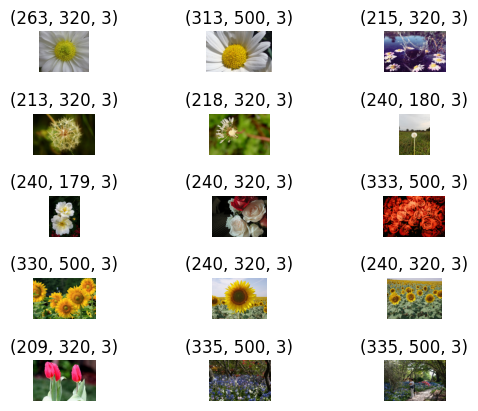

In [9]:
array_rutas = [daisy_dir,dandelion_dir,roses_dir,sunflowers_dir,tulips_dir]
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
archivos = list()
for i in array_rutas:
    carpeta = os.path.join(i,'*')
    archivos += glob.glob(carpeta)[0:3]    
    
for j,path in enumerate(archivos):
    imagen = keras.utils.load_img(archivos[j])
    sp = plt.subplot(len(array_rutas), 3, j + 1)
    sp.axis('Off')
    plt.subplots_adjust(hspace=1)
    
    img = mpimg.imread(path)
    plt.title(img.shape)
    plt.imshow(img)

Implemente una red convolucional para resolver el problema de clasificación. Para ello se sugiere una CNN con 3 capas convolucionales + pooling con la siguiente estructura:

Bloque de procesamiento de imagen:
1.   32 kernels -> 64 kernels -> 96 kernels
2.   kernels de 3x3. 
3.   Stride = 1 y padding = SI.
4.   Función de activación ReLU.
5.   Maxpooling de 2x2 con stride clásico de 2 pixeles.
6.   Igualamos el tamaño de todas las imágenes a 150 x 150. 

Bloque de decisión:
7.   Capa densa de 512 neuronas.
8.   Capa densa de salida.

**Entrene un modelo con la estructura anterior de manera que obtenga un accuracy (sobre el conjunto de validación) > 60%.** Utilice el optimizador que considere más adecuado. 

Sugerencias: 
*   Recuerda que si no se realiza conversión a One-Hot de la etiqueta a predecir, debes utilizar como función de error `SparseCategoricalCrossentropy` (este es el procedimiento que hemos usado en clase).
*   Considera un learning rate en el entorno de 0.001.
*   En el caso de los generators utiliza `class_mode='sparse'`.
*   Puedes utilizar p.e. un `batch_size = 100`.




In [14]:
#estructura -> c1 -> p1 -> c2 ->p2 -> c3 -> p3 -> decision -> 5 clases
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

red_60 = keras.models.Sequential()

red_60.add(keras.layers.Conv2D(
              filters=32,         # filtros
              kernel_size=(3, 3), # tamaño filtro
              strides=1,          # como viaja, es el valor por defecto
              padding='same',     # utiliza padding
              activation='relu', 
              name='conv1',
              input_shape=(150, 150, 3))) 

red_60.add(keras.layers.MaxPooling2D(pool_size=2, strides=2,name='pool1'))
red_60.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu',name='conv2'))
red_60.add(keras.layers.MaxPooling2D(pool_size=2, strides=2,name='pool2'))
red_60.add(keras.layers.Conv2D(96, (3, 3), strides=1, padding='same', activation='relu',name='conv3'))
red_60.add(keras.layers.MaxPooling2D(pool_size=2, strides=2,name='pool3'))

#hay que hacer flattern porque va a entrar en las capas densas
red_60.add(keras.layers.Flatten())
red_60.add(keras.layers.Dense(512, activation='relu',name='d1'))
red_60.add(keras.layers.Dense(len(classes), activation='softmax',name='d2')) 




In [24]:

rate = 0.001
optim = keras.optimizers.Adam(learning_rate=rate)
red_60.compile(loss='sparse_categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

In [25]:

from keras.preprocessing.image import ImageDataGenerator 


class_mode='sparse'
batch_size = 100


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,               # directorio con las imagenes
        target_size=(150, 150),  # resized a 150x150
        batch_size=batch_size,    # tamaño de batch 
        class_mode=class_mode)     # labels binarios (coherente con loss function)

valid_generator = val_datagen.flow_from_directory(
        val_dir,               # directorio con las imagenes
        target_size=(150, 150),  # resized a 150x150
        batch_size=batch_size,    # tamaño de batch 
        class_mode=class_mode)     # labels binarios (coherente con loss function)

es_callback = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)



Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [26]:
history = red_60.fit(
      train_generator,
      steps_per_epoch=29,  # 2935 images = 100 * steps,
      epochs=100,
      validation_data=valid_generator,
      validation_steps=7,  # 735 images = 100 * steps,
      callbacks=[es_callback],
      verbose=2)

Epoch 1/15
29/29 - 26s - loss: 1.5304 - acc: 0.3644 - val_loss: 1.1975 - val_acc: 0.4829 - 26s/epoch - 886ms/step
Epoch 2/15
29/29 - 25s - loss: 1.1121 - acc: 0.5376 - val_loss: 1.0480 - val_acc: 0.5657 - 25s/epoch - 858ms/step
Epoch 3/15
29/29 - 25s - loss: 0.9760 - acc: 0.6109 - val_loss: 0.9451 - val_acc: 0.6343 - 25s/epoch - 857ms/step
Epoch 4/15
29/29 - 25s - loss: 0.8101 - acc: 0.6889 - val_loss: 0.8442 - val_acc: 0.6743 - 25s/epoch - 862ms/step
Epoch 5/15
29/29 - 25s - loss: 0.6876 - acc: 0.7379 - val_loss: 0.8511 - val_acc: 0.6886 - 25s/epoch - 864ms/step
Epoch 6/15
29/29 - 25s - loss: 0.5539 - acc: 0.7929 - val_loss: 0.9009 - val_acc: 0.6614 - 25s/epoch - 865ms/step
Epoch 7/15
29/29 - 25s - loss: 0.3964 - acc: 0.8617 - val_loss: 0.9565 - val_acc: 0.6914 - 25s/epoch - 864ms/step
Epoch 8/15
29/29 - 25s - loss: 0.2459 - acc: 0.9160 - val_loss: 1.1186 - val_acc: 0.6714 - 25s/epoch - 866ms/step


Salida: 
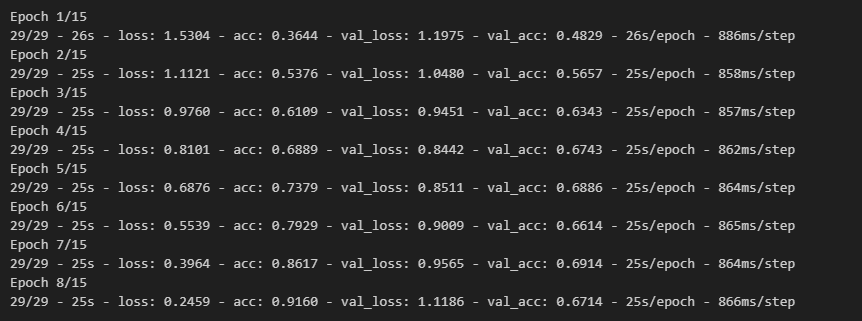

Indica cual es el shape de la imagen antes y después de cada capa de la red. **Explica cómo has obtenido dichos valores**. Compara el resultado con un summary() del modelo

|Capa| Shape a la salida| #parámetros | 
|:-|:-:|:-:|
|Conv_1|150, 150, 32|2160032
|Pool_1|75, 75, 32|540032
|Conv_2|75, 75, 64|1080064
|Pool_2|37, 37, 64|87680
|flatten|31104|62208
|densa_1|512| 1024






In [56]:
'''
Para las redes convulocionales -> tamaño de la imagen (alto_entrada,ancho_entrada,kernels)
Pooling -> si hay padding el tamaño se mantiene. Dividir el tamaño por el stride (2 en este caso)
conv1 = 150,150,32
pool1 = 75, 75, 32
conv2 = 75, 75, 64
pool2 = 37, 37, 64
conv3 = 37, 37, 96
conv3 = 18, 18, 96

parametros en convs y pools = ancho * alto * canales * kernels + |kernels|
                                                    ↑ bias

en flattern y densas = neuronas + |neuronas|
densa1 = 512
densa2= 5 (1 por clase)
'''
red_60.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 150, 150, 32)      896       
                                                                 
 pool1 (MaxPooling2D)        (None, 75, 75, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 75, 75, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 37, 37, 64)        0         
                                                                 
 conv3 (Conv2D)              (None, 37, 37, 96)        55392     
                                                                 
 pool3 (MaxPooling2D)        (None, 18, 18, 96)        0         
                                                                 
 flatten_1 (Flatten)         (None, 31104)            

Muestra la evolución de la función de error (train y valid) durante el entrenamiento.__Explica qué problema presenta el modelo que hemos entrenado.__

Text(0.5, 1.0, 'Training and validation loss')

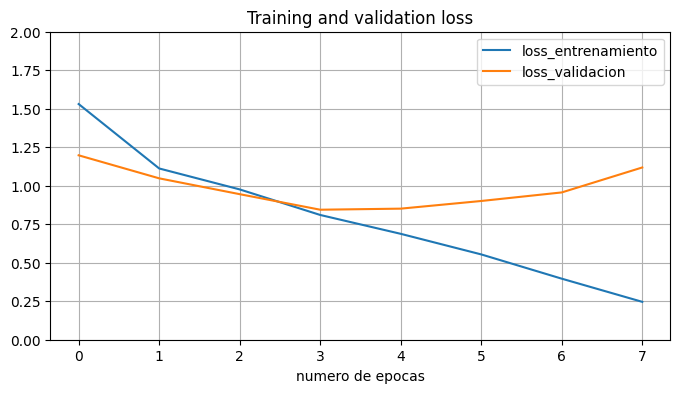

In [31]:
#Muestra overfitting, ya que a medida que aumenta la precision en el conjunto de entrenamiento
#llega a un punto en el que la precisión del conjunto de validación disminuye.
#Entonces aqui el modelo no está aprendiendo, está memorizando los datos de entrada.
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame({'loss_entrenamiento': history.history['loss'],
              'loss_validacion': history.history['val_loss']}).plot(figsize=(8,4))

plt.grid(True)
plt.ylim(0,2)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss')

#De hecho en la tercera epoch ya se ve el overfitting

# d) Modelo 2: reducción del overfitting (objetivo: accuracy_valid > 70%)

Introduzca en el modelo anterior las dos técnicas más habituales de reducción del overfitting: 

    * drop-out
    * data augmentation
    
El objetivo es alcanzar un **objetivo es conseguir un accuracy sobre el conjunto de validacion > 70%.**

**Explica en qué consisten y qué utilidad tienen para nuestro problema**

In [50]:
#Data augmerntation, evitar lo que comentamos antes: la memorización. Y así forzar al modelo a que 
#aprenda de verdad. Se generan nuevas imágenes en base de alterar las existentes del conjunto de entrada.
#En este caso rotamos, desplazamos,hacemos zoom, hacemos flip horizontal(ya que vertical no tiene mucho sentido)
#Dropout desactiva neuronas de la capa con una probabilidad (en este caso 0.5). Es aleatorio con lo cual 
# en cada epoch cambian las neuronas que están activas o no lo están

train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen2 = ImageDataGenerator(rescale=1./255)



class_mode='sparse'
batch_size = 100

train_generator2 = train_datagen2.flow_from_directory(
        train_dir,               # directorio con las imagenes
        target_size=(150, 150),  # resized a 150x150
        batch_size=batch_size,    # tamaño de batch 
        class_mode=class_mode)     # labels binarios (coherente con loss function)

valid_generator2 = val_datagen2.flow_from_directory(
        val_dir,               # directorio con las imagenes
        target_size=(150, 150),  # resized a 150x150
        batch_size=batch_size,    # tamaño de batch 
        class_mode=class_mode)     # labels binarios (coherente con loss function)

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [51]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

red_70 = keras.models.Sequential()

red_70.add(keras.layers.Conv2D(
              filters=32,         # filtros
              kernel_size=(3, 3), # tamaño filtro
              strides=1,          # como viaja, es el valor por defecto
              padding='same',     # utiliza padding
              activation='relu', 
              name='conv1',
              input_shape=(150, 150, 3))) 

red_70.add(keras.layers.MaxPooling2D(pool_size=2, strides=2,name='pool1'))
red_70.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu',name='conv2'))
red_70.add(keras.layers.MaxPooling2D(pool_size=2, strides=2,name='pool2'))
red_70.add(keras.layers.Conv2D(96, (3, 3), strides=1, padding='same', activation='relu',name='conv3'))
red_70.add(keras.layers.MaxPooling2D(pool_size=2, strides=2,name='pool3'))

#hay que hacer flattern porque va a entrar en las capas densas
red_70.add(keras.layers.Flatten())
red_70.add(keras.layers.Dense(512, activation='relu',name='d1'))
red_70.add(keras.layers.Dropout(0.5))
red_70.add(keras.layers.Dense(len(classes), activation='softmax',name='d2')) 

__Explica qué tipos de augmentation vas a considerar y qué utilidad tienen en nuestro problema de clasificacion__

    En este caso rotamos, desplazamos,hacemos zoom, hacemos flip horizontal(ya que vertical no tiene mucho sentido)
    
    Dropout desactiva neuronas de la capa con una probabilidad (en este caso 0.5). Es aleatorio con lo cual 
    en cada epoch cambian las neuronas que están activas o no lo están  forzando a que se aprendan características de los datos en lugar de memorizarlos

In [55]:
from keras.optimizers import RMSprop

rate = 0.001
optim = RMSprop(learning_rate=rate)
red_70.compile(loss='sparse_categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

In [67]:
es_callback = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = red_70.fit(
    train_generator2,
    steps_per_epoch=29,  # 2935 images/100 (batch tam) = steps
    epochs=30,
    validation_data=valid_generator2,
    validation_steps=7,  # 735 images/100 = steps
    callbacks=[es_callback],
verbose=2)

Epoch 1/30
29/29 - 32s - loss: 0.7951 - acc: 0.6949 - val_loss: 0.8347 - val_acc: 0.7129 - 32s/epoch - 1s/step
Epoch 2/30
29/29 - 32s - loss: 0.7886 - acc: 0.6864 - val_loss: 0.8191 - val_acc: 0.7043 - 32s/epoch - 1s/step
Epoch 3/30
29/29 - 32s - loss: 0.7981 - acc: 0.6797 - val_loss: 0.8320 - val_acc: 0.7057 - 32s/epoch - 1s/step
Epoch 4/30
29/29 - 31s - loss: 0.7875 - acc: 0.6868 - val_loss: 0.8128 - val_acc: 0.7186 - 31s/epoch - 1s/step
Epoch 5/30
29/29 - 31s - loss: 0.7959 - acc: 0.6801 - val_loss: 0.8222 - val_acc: 0.6986 - 31s/epoch - 1s/step
Epoch 6/30
29/29 - 31s - loss: 0.7976 - acc: 0.6917 - val_loss: 0.8608 - val_acc: 0.6771 - 31s/epoch - 1s/step
Epoch 7/30
29/29 - 31s - loss: 0.7866 - acc: 0.6861 - val_loss: 0.8184 - val_acc: 0.7086 - 31s/epoch - 1s/step
Epoch 8/30
29/29 - 31s - loss: 0.7844 - acc: 0.6892 - val_loss: 0.8178 - val_acc: 0.7171 - 31s/epoch - 1s/step
Epoch 9/30
29/29 - 31s - loss: 0.7869 - acc: 0.6783 - val_loss: 0.8384 - val_acc: 0.7171 - 31s/epoch - 1s/step


Salida:

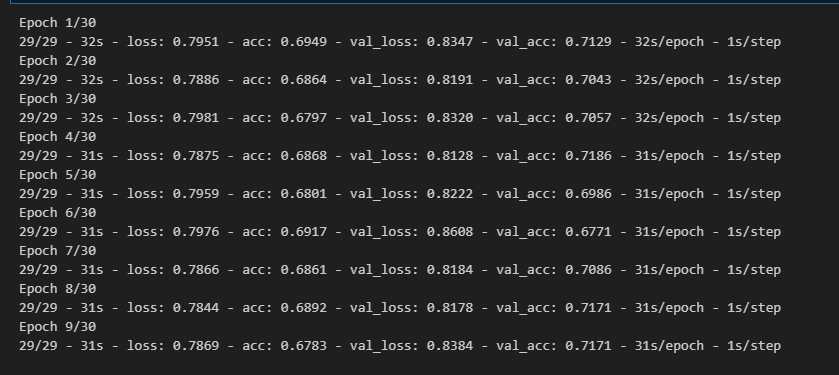

Muestra la evolucion de la funcion de error durante el entrenamiento. __Explica qué diferencias de comportamiento hay entre las gráficas del modelo a) y las del modelo b)__

Text(0.5, 1.0, 'Training and validation loss')

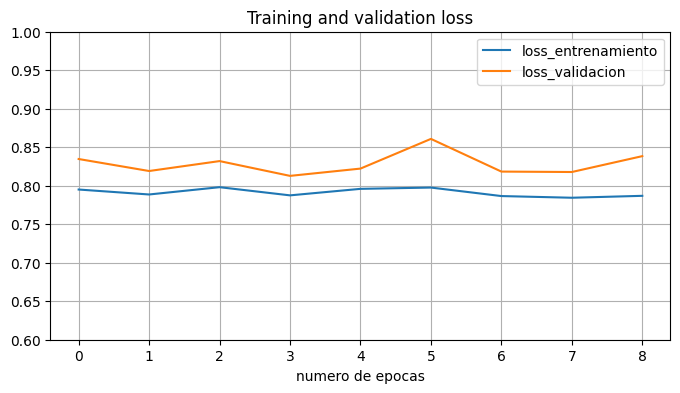

In [71]:
pd.DataFrame({'loss_entrenamiento': history.history['loss'],
              'loss_validacion': history.history['val_loss']}).plot(figsize=(8,4))

plt.grid(True)
plt.ylim(0.6,1)
plt.xlabel('numero de epocas')
plt.title('Training and validation loss')

El modelo se ahdiere mucho más a las características generales en lugar de memorizar las imagenes. Se puede ver ya que el error en ambos conjuntos (train y validación) el error baja de forma pareja.
Además en ningún epoch se ve una separación (como la del epoch 3 de antes) que sugiera que el modelo sigue teniendo errores de overfit.

# e) Modelo 3: Transfer Learning (objetivo: accuracy_valid > 88%)

En nuestro problema de clasificación de flores, el utilizar CNNs diseñadas y entrenadas por nosotros mismos, aparece una barrera en las proximidades del 75-80% de precisión del modelo (siempre sobre validación). 

Para superar este escollo, el siguiente paso natural es la utilización de modelos preentrenados. Existe una gran variedad de ellos basados en redes CNNs clásicas, donde la principal diferencia es que acumulan más capas que nuestros modelos 1 y 2. Adicionalmente, en estos modelos se han ido incorporando diferentes propuestas para mejorar la arquitectura de la CNN.

En general, utilizando estos modelos convolucionales preentrenados podemos alcanzar accuracies próximos al 90%. Normalmente, estos modelos han sido previamente entrenados sobre datasets de gran tamaño y con gran número de categorías. P.e. en subconjuntos de Imagenet (14 millones de imagenes de 22K categorías).

Dado que estos modelos se entrenaron para resolver un problema "relativamente" parecido a nuestro problema de clasificación, parece razonable pensar que podemos aprovechar ese conocimiento capturado en la red para resolver nuestro problema de clasificación de flores.

Se pide que implemente y entrene un modelo utilizando una de estas redes pre-entrenadas (__con el objetivo de alcanzar un accuracy (sobre el conjunto de validación > 88%__). Los pasos que debe seguir son: 

1.   Importa el modelo desde Tensorflow.
2.   Dado que este modelo ha sido entrenado para clasificar entre 1.000 categorías, las capas densas finales del modelo no son útiles para nuestro problema de clasificación de 5 categorías (es lo que suele llamarse include_top = SI/NO). De manera que eliminamos lo que a veces se suele llamar el "top model". De este modo sólo nos quedamos con la parte que hace la funcionalidad de "procesamiento" de la imagen.
3.   Añadimos una capa de flatten y tres nuevas capas densas especificas para nuestro problema con dimensiones 4096, 1072 y la que necesite la capa de salida (con sus correspondientes drop-out). 
4.   Después haremos el denominado `Fine-Tuning` del modelo. Para ello le indicaremos a Tensorflow que únicamente debe entrenar:
   * Las dos últimas capas convolucinoales de la red preentrenada
   * Las tres capas densas que hemos incluido nuevas.
    
  De esta forma, quedan congeladas (no se entrenan los pesos) todas las capas convolucionales de la red preentrenada, excepto las dos últimas. Para estados dos últimas capas convolucionales, usando como punto de partida los del pre-trained model obtendremos un ajuste fino de sus pesos. Por supuesto, tensorflow entrenará no solo estas dos ultimas capas convolucionales, sino también las tres capas densas que hemos añadido.

5. Dado que estamos reutilizando un modelo que no "es nuestro", deberemos ceñirnos al tamaño de imagen que permite la red a la entrada. 

Para elegir el modelo preentrenado que debe utilizar cada grupo, proceda del siguiente modo:
* Paso 1: sume los DNIs de los componentes del grupo (si el grupo tiene un sólo miembro, vaya directamente al paso 2). res = dni_1 + dn_2
* Paso 2: Aplique la siguiente operación al resultado anterior: res mod 6. 
* Paso 3: Tome el modelo cuyo número asociado coincide con el resultado de la operación anterior. 
* Paso 4: El porcentaje que aparece entre paréntesis junto al nombre del modelo es el accuracy (en validación) que deberías poder alcanzar sin dificultad utilizando el modelo. En todos los casos considera un input_shape = (224, 224, 3).

  0. Resnet50 (>90%) 
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50

  1. Resnet101 (>90%) input_shape = (224, 224, 3)
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/ResNet101

  2. VGG16 (>90%) input_shape = (224, 224, 3)
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

  3. VGG19 (>90%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19/VGG19

  4. Xception (>88%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/xception/Xception

  5. Inceptionv3 (>88%) input_shape = (224, 224, 3) https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3

P.e. si los DNIs de los alumnos son: 12345678 y 23456781. La suma es 35802467. De donde 35802467 mod 6 = 5. Por tanto, tomaríamos el modelo Inceptionv3.



6.   Una vez definido el modelo tenemos que crear los data_generators asociados. Para ello:
> * Utiliza Data augmentation.  
> * Las imágenes tienen que ser preprocesadas igual que cuando se entrenó el modelo VGG original. Para ello se utiliza el parámetro `preprocessing_function=preprocess_input` (preprocess_input importado desde `keras.applications.vgg16` en ambos generators (train y valid). Por tanto, no hay que indicarle `rescale`. En caso de ser necesario, se encargará `preprocess_input`.  
> * Recuerda que el tamaño de imagen debe ser: 224x224.





7.   A la hora de entrenar un modelo pretrained es típico bajar el learning rate respecto al que utilizaríamos para un modelo nuestro desde cero.

Investiga cómo es la estructura del modelo preentrenado que has utilizado. Descríbelo